In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

# Import ds_utils ML evaluation functions
from ds_utils.ml_eval import (
    classification_summary,
    regression_summary,
    plot_confusion_matrix,
    plot_roc_curve,
    plot_precision_recall_curve,
    plot_calibration_curve,
    plot_residuals,
    plot_prediction_error,
    plot_residual_distribution,
    plot_feature_importance,
    plot_learning_curve,
    plot_validation_curve,
)
from ds_utils.plotting import apply_corporate_style

apply_corporate_style()

{'font.family': 'DejaVu Sans',
 'font.size': 12,
 'axes.titlesize': 14,
 'axes.labelsize': 12,
 'xtick.labelsize': 10,
 'ytick.labelsize': 10,
 'legend.fontsize': 10,
 'axes.grid': True,
 'grid.linestyle': '--',
 'grid.alpha': 0.3,
 'grid.color': '#cccccc',
 'axes.spines.top': False,
 'axes.spines.right': False,
 'figure.facecolor': 'white',
 'axes.facecolor': 'white',
 'savefig.facecolor': 'white'}

## 1. Classification Example

In [2]:
# Generate classification data
X_clf, y_clf = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42,
)

feature_names = [f'feature_{i}' for i in range(X_clf.shape[1])]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 800
Test samples: 200


In [3]:
# Classification metrics summary
metrics = classification_summary(y_test, y_pred)
print("Classification Metrics:")
display(metrics)

Classification Metrics:


,Metric,Value
0,Accuracy,0.915000
1,Precision (binary),0.885714
2,Recall (binary),0.948980
3,F1 Score (binary),0.916256
4,Total Samples,200.000000


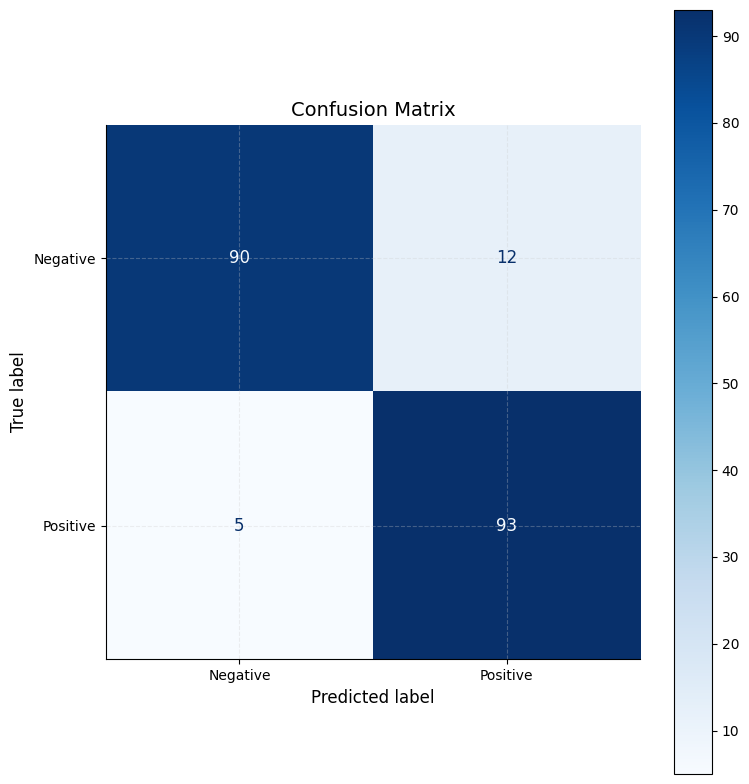

In [4]:
# Confusion Matrix
fig, ax = plot_confusion_matrix(
    y_test, y_pred,
    labels=['Negative', 'Positive'],
    title='Confusion Matrix',
)
plt.show()

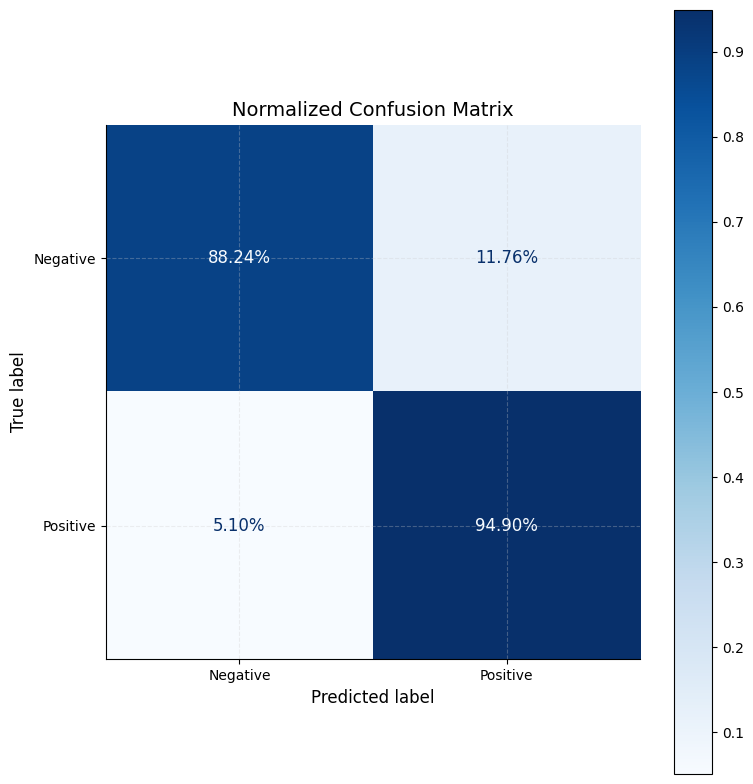

In [5]:
# Normalized Confusion Matrix
fig, ax = plot_confusion_matrix(
    y_test, y_pred,
    labels=['Negative', 'Positive'],
    normalize='true',
    title='Normalized Confusion Matrix',
)
plt.show()

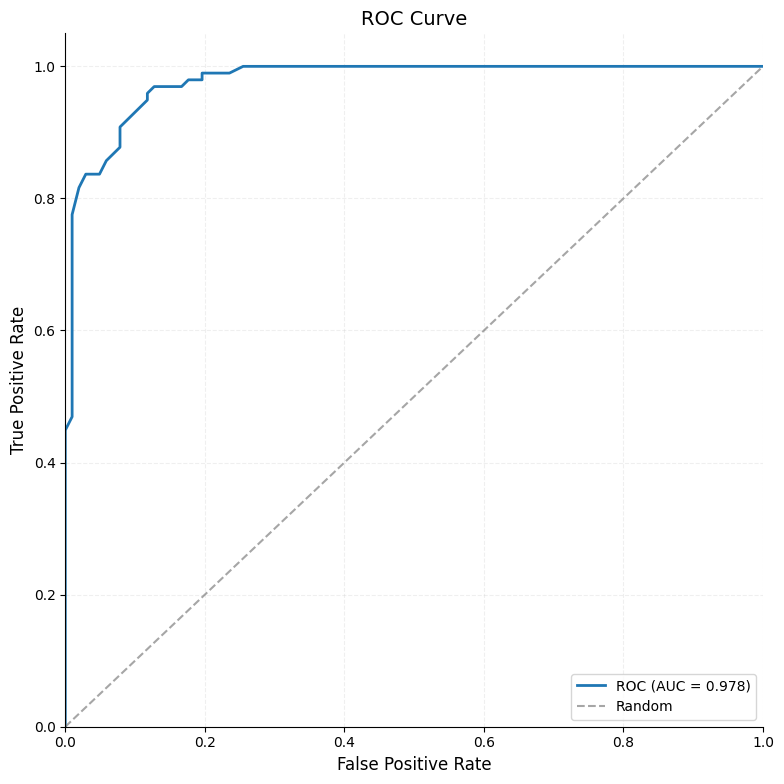

In [6]:
# ROC Curve
fig, ax = plot_roc_curve(
    y_test, y_proba,
    title='ROC Curve',
    show_auc=True,
)
plt.show()

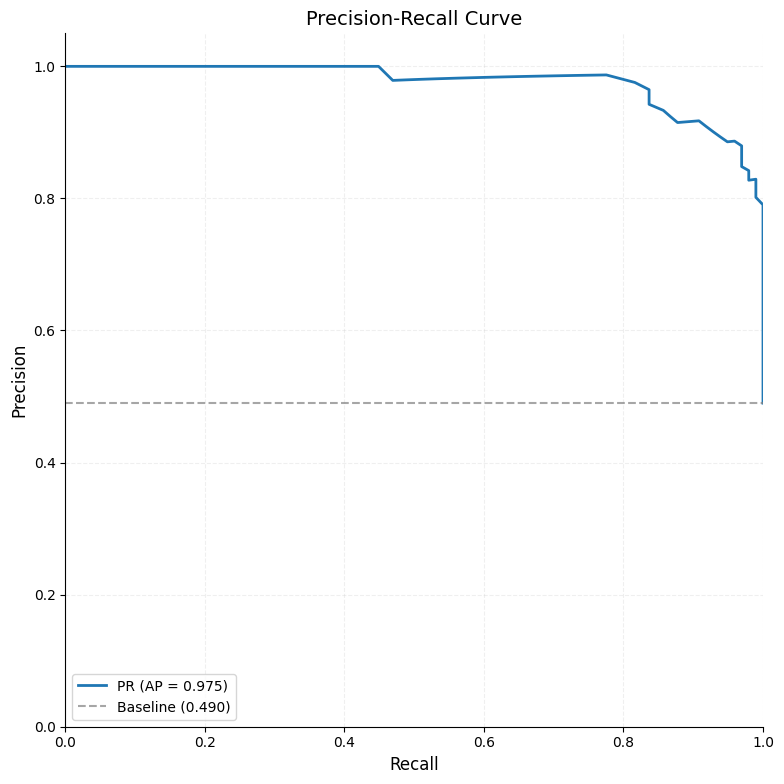

In [7]:
# Precision-Recall Curve
fig, ax = plot_precision_recall_curve(
    y_test, y_proba,
    title='Precision-Recall Curve',
    show_ap=True,
)
plt.show()

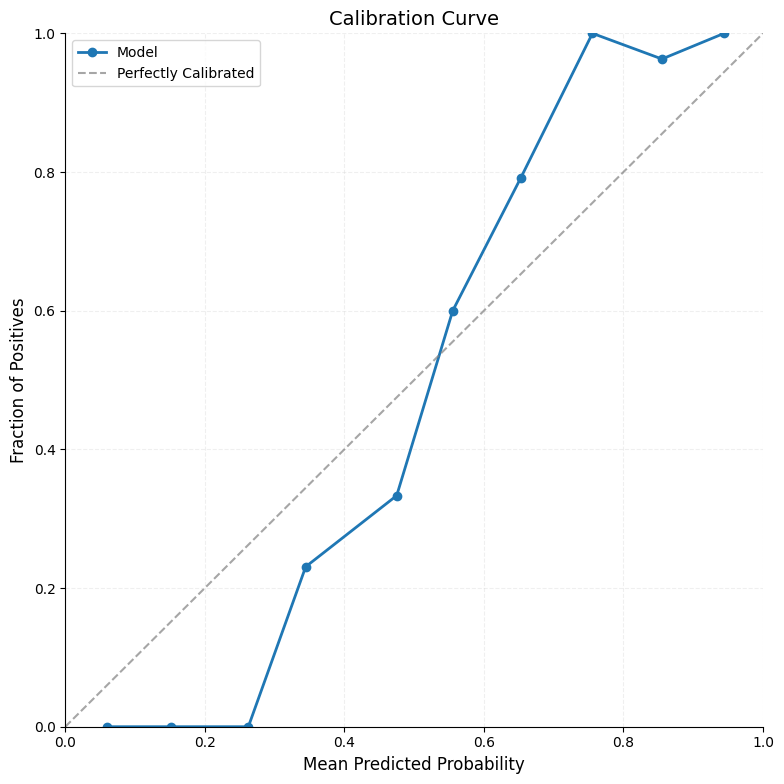

In [8]:
# Calibration Curve
fig, ax = plot_calibration_curve(
    y_test, y_proba,
    title='Calibration Curve',
    n_bins=10,
)
plt.show()

## 2. Regression Example

In [9]:
# Generate regression data
X_reg, y_reg = make_regression(
    n_samples=500,
    n_features=10,
    n_informative=5,
    noise=20,
    random_state=42,
)

# Train/test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Train a regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = reg.predict(X_test_reg)

print(f"Training samples: {len(X_train_reg)}")
print(f"Test samples: {len(X_test_reg)}")

Training samples: 400
Test samples: 100


In [10]:
# Regression metrics summary
metrics_reg = regression_summary(y_test_reg, y_pred_reg)
print("Regression Metrics:")
display(metrics_reg)

Regression Metrics:


,Metric,Value
0,MAE (Mean Absolute Error),24.518113
1,RMSE (Root Mean Squared Error),32.359240
2,R² Score,0.779393
3,MAPE (Mean Absolute Percentage Error),2.444646
4,Total Samples,100.000000
5,Residual Mean,-9.389357
6,Residual Std,30.967086
7,Residual Min,-103.485625
8,Residual Max,96.113976


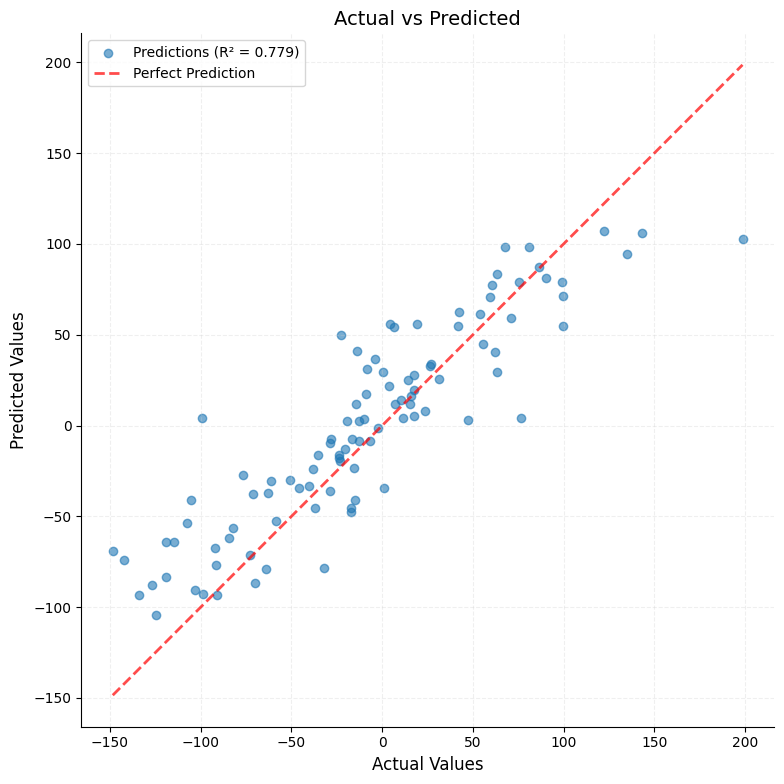

In [11]:
# Actual vs Predicted
fig, ax = plot_prediction_error(
    y_test_reg, y_pred_reg,
    title='Actual vs Predicted',
    show_r2=True,
)
plt.show()

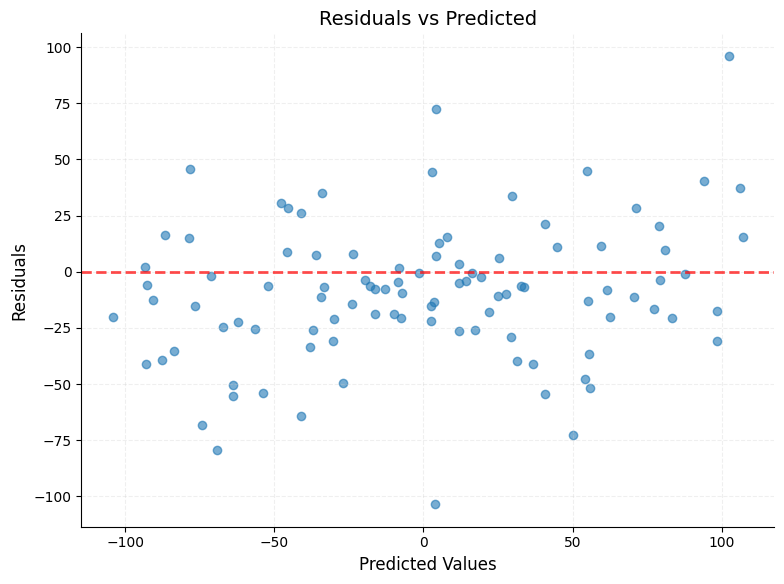

In [12]:
# Residuals Plot
fig, ax = plot_residuals(
    y_test_reg, y_pred_reg,
    title='Residuals vs Predicted',
)
plt.show()

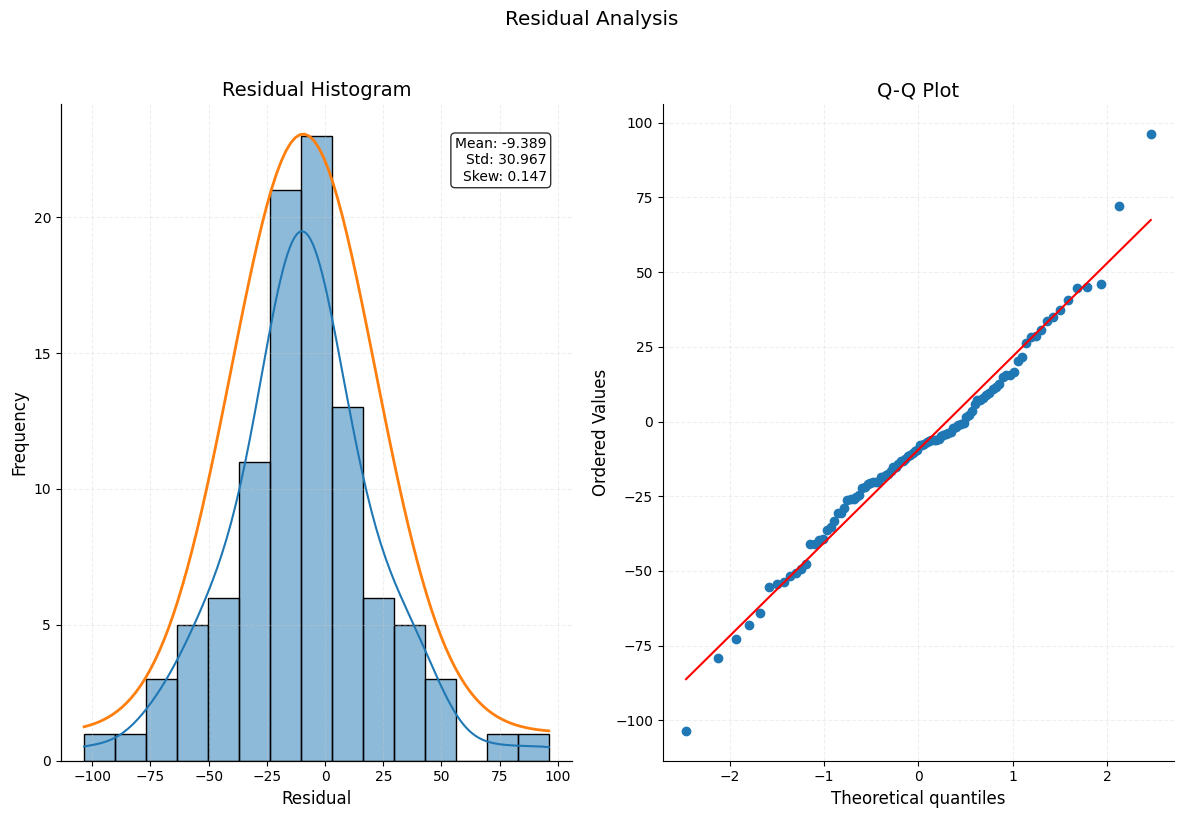

In [13]:
# Residual Distribution
fig, axes = plot_residual_distribution(
    y_test_reg, y_pred_reg,
    title='Residual Analysis',
)
plt.show()

## 3. Feature Importance

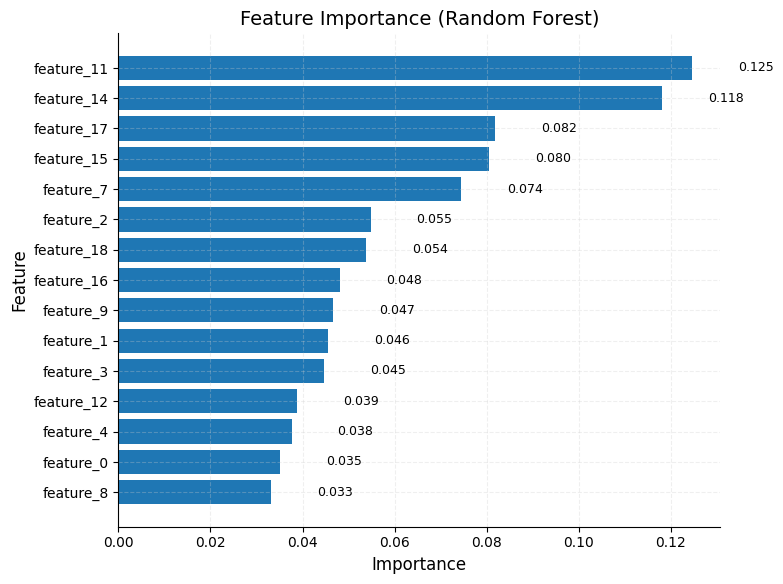

In [14]:
# Feature importance from Random Forest
fig, ax = plot_feature_importance(
    clf.feature_importances_,
    feature_names=feature_names,
    top_n=15,
    title='Feature Importance (Random Forest)',
)
plt.show()

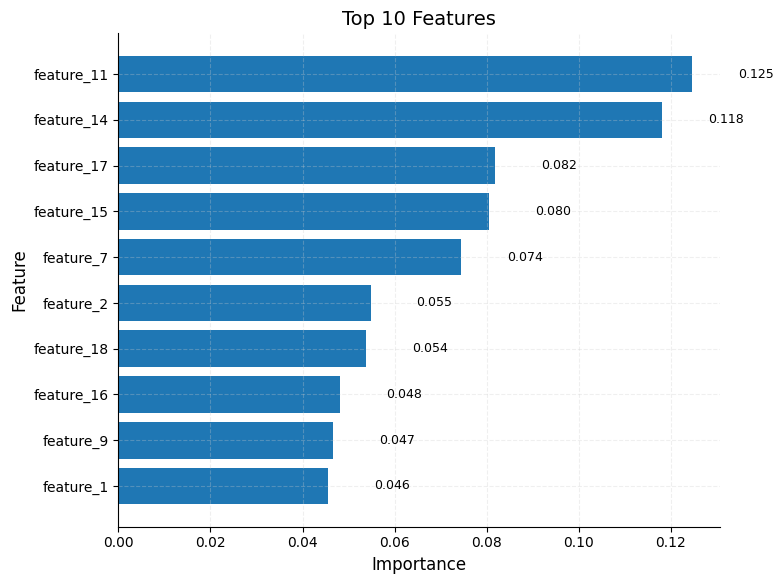

In [15]:
# Feature importance as dict
importance_dict = dict(zip(feature_names, clf.feature_importances_))

fig, ax = plot_feature_importance(
    importance_dict,
    top_n=10,
    title='Top 10 Features',
)
plt.show()

## 4. Learning Curves

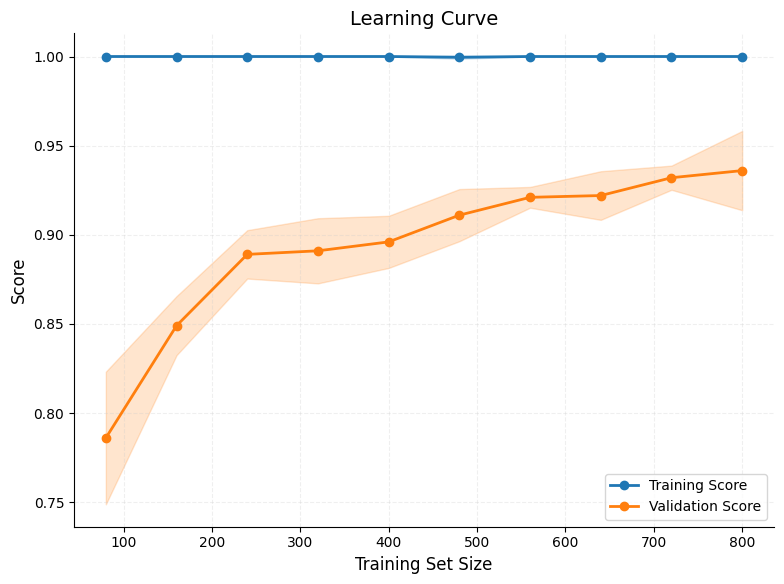

In [16]:
# Learning curve
fig, ax = plot_learning_curve(
    RandomForestClassifier(n_estimators=50, random_state=42),
    X_clf, y_clf,
    cv=5,
    title='Learning Curve',
    n_jobs=-1,
)
plt.show()

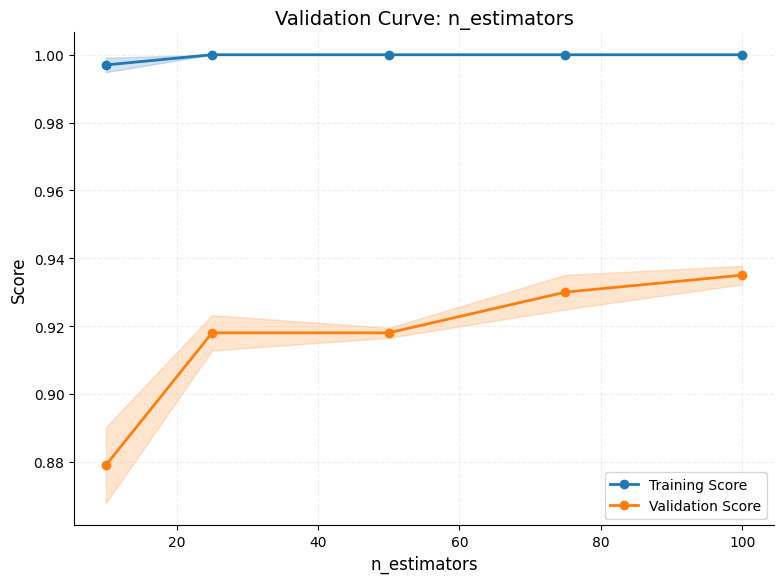

In [17]:
# Validation curve (hyperparameter tuning)
fig, ax = plot_validation_curve(
    RandomForestClassifier(random_state=42),
    X_clf, y_clf,
    param_name='n_estimators',
    param_range=[10, 25, 50, 75, 100],
    cv=3,
    title='Validation Curve: n_estimators',
    n_jobs=-1,
)
plt.show()

## 5. Model Comparison

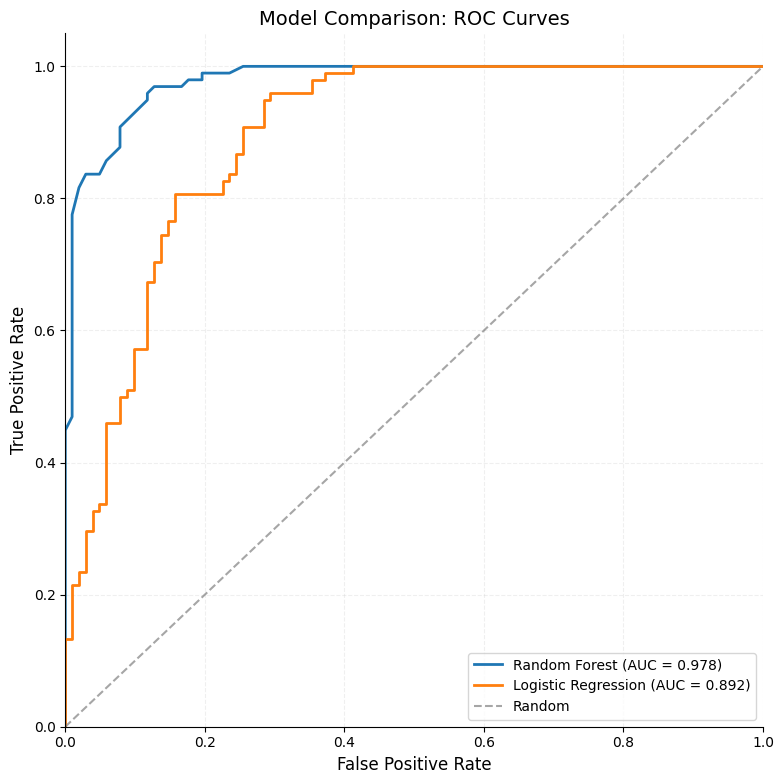

In [18]:
# Compare multiple models using ROC curves
from sklearn.svm import SVC

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
}

# Train and get probabilities
model_probas = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    model_probas[name] = model.predict_proba(X_test)[:, 1]

# Plot ROC curves for all models
fig, ax = plot_roc_curve(
    y_test, model_probas,
    title='Model Comparison: ROC Curves',
)
plt.show()

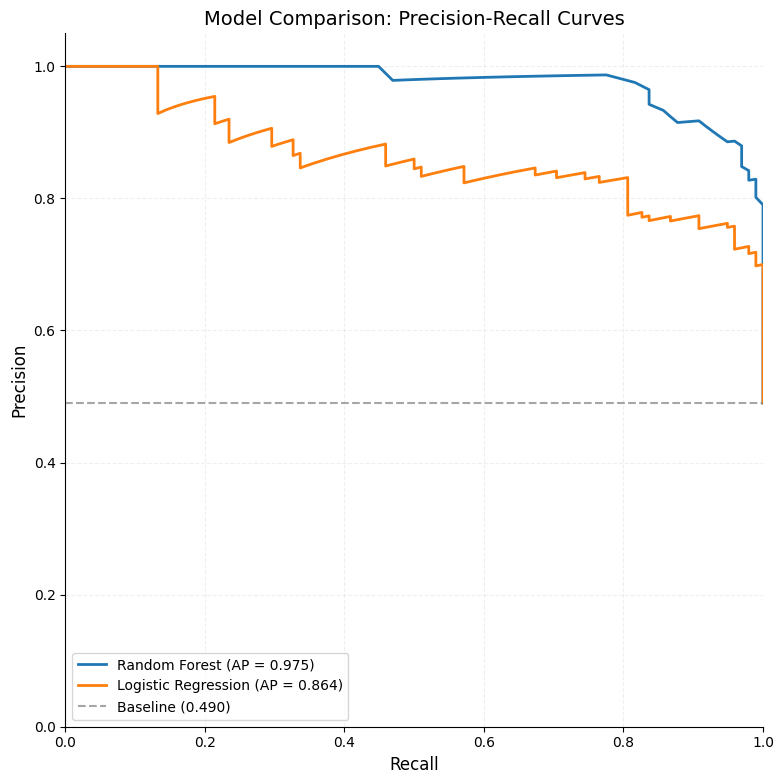

In [19]:
# PR Curves comparison
fig, ax = plot_precision_recall_curve(
    y_test, model_probas,
    title='Model Comparison: Precision-Recall Curves',
)
plt.show()

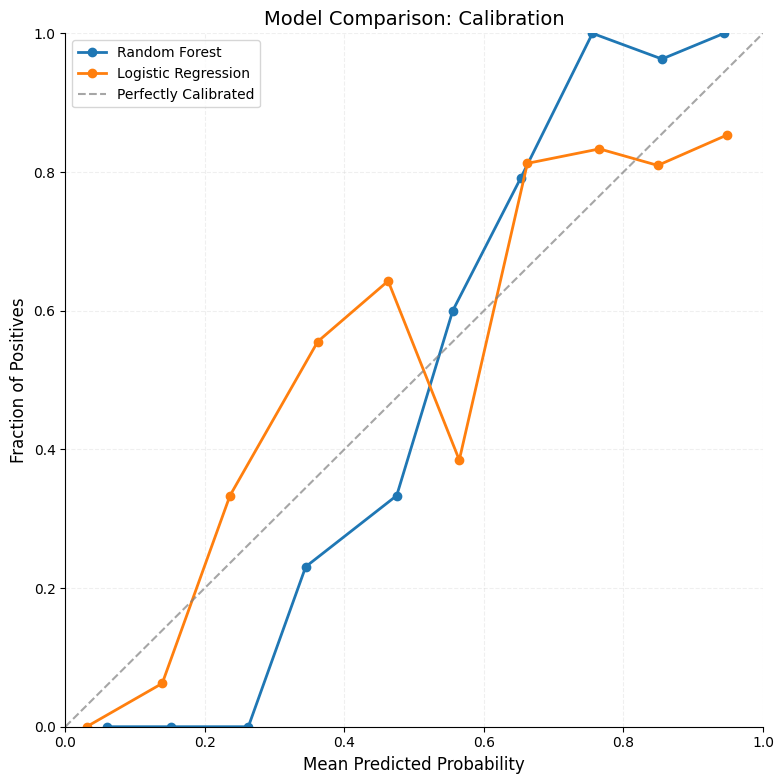

In [20]:
# Calibration comparison
fig, ax = plot_calibration_curve(
    y_test, model_probas,
    title='Model Comparison: Calibration',
)
plt.show()

## Summary

This notebook demonstrated:
- Classification metrics and visualizations
- Regression metrics and residual analysis
- Feature importance plots
- Learning and validation curves
- Model comparison techniques